# **I-Introduction**

In the modern era of technology, the use of machine learning has become a valuable tool for evaluating and predicting the financial health of businesses. Financial health is a crucial factor in assessing the operational capability and growth potential of a company. By employing machine learning models such as Logistic Regression, Random Forest, Naive Bayes, XGBoost, AdaBoost, and Support Vector Machine (SVM), it is possible to forecast the financial health of businesses. These models utilize complex techniques and algorithms to analyze financial data, recognize patterns, and identify key factors that influence a company's financial health. The outcomes derived from applying these models can provide predictive information about profitability, financial risks, and overall financial status of a business, enabling managers and investors to make decisions based on accurate and realistic insights.

# **II-Import data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive',  force_remount=True)
path = "/content/drive/MyDrive/UEL"
# Mount Google Drive to a directory containing data

Mounted at /content/drive


In [ ]:
import os
path = "/content/drive/MyDrive/UEL"
print(os.path.isdir(path))
print(os.path.isfile(path+"/ML.xlsx"))
# Check if a path exists

True
True


In [ ]:
import pandas as pd #library for working with data frames
import seaborn as sns #library for plotting
import numpy as np # library for working with numbers
import matplotlib.pyplot as plt #library for plotting
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
data = pd.read_excel("/content/drive/MyDrive/UEL/Dữ liệu nghiên cứu ds.xlsx") # read data from the specified path

The data was obtained from the financial reports of 44 companies on the cafef website from 2018 to 2020, resulting in 132 observations. Among these, 13 company belongs to the HOSE (Ho Chi Minh Stock Exchange), 16 companies belong to the HNX (Hanoi Stock Exchange), and 15 companies belong to the UPCOM (UpCom Stock Exchange).

The financial health of a business is calculated based on the Z-score model developed by Professor Edward Altman after years of research. He first published the Z-score model in the Journal of Finance in 1998.

The model is represented as follows:

Z = 1.2X1 + 1.4X2 + 3.3X3 + 0.64X4 + 0.999*X5

Where:

X1: Current ratio = current assets divided by total assets

X2: Retained earnings ratio = retained earnings divided by total assets

X3: Earnings before interest and taxes ratio = EBIT divided by total assets

X4: Market value of equity ratio = market value of equity divided by total liabilities

X5: Sales ratio = sales divided by total assets

The dependent variable X24 is labeled as follows:

Z > 1.81: The business has no financial health issues (Good)

Z < 1.81: The business has financial health issues (Bad)

In [ ]:
data

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24
0,0.779999,0.491976,0.072976,0.609641,0.390359,1.561746,2.205170,3.614843e+00,41.424343,10.179024,...,3.251181,6.495760e+10,0.103183,2211.001752,0.104383,0.055800,0.064888,2.001962e-01,0.718071,1
1,0.522742,0.300723,0.082274,0.795368,0.204632,3.886828,2.492060,8.569416e+00,0.964873,41.598663,...,6.142871,7.980785e+07,0.174268,3594.091316,0.004516,0.103909,0.102599,1.513302e-09,1.768485,1
2,1.637855,0.944485,0.276489,0.483024,0.516976,0.934324,8.396559,3.332435e+00,66.982391,10.431021,...,0.972381,4.537364e+08,0.024354,249.653728,0.361285,-0.002020,0.013886,1.282116e+00,1.219753,1
3,1.041591,1.041590,0.007095,0.951623,0.048674,19.544944,1.122480,3.105215e+06,124.289868,5.405687,...,0.427693,5.342190e+09,1.087138,2004.660912,0.039566,0.017336,0.052915,8.368107e-11,2.518587,1
4,0.087973,0.053111,0.008021,6.084394,5.084394,1.196680,5.528003,8.499005e+00,166.293599,28.367906,...,123.389342,9.387646e+10,-0.298396,23414.849630,-5.533823,-0.008227,1.512596,3.765660e-09,2.104491,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,2.437741,1.778638,0.678318,0.361996,0.638004,0.567388,9.604458,4.957067e+00,63.601458,32.844440,...,8.084524,1.800008e+09,0.162973,2530.963261,0.520456,0.077986,0.103977,1.332423e+00,1.501352,1
128,4.674016,1.631516,1.141954,0.141068,0.858932,0.164237,18.978059,1.273672e+01,4.859868,839.389323,...,8.412263,2.172183e+08,0.129290,4078.539647,0.518286,0.076381,0.111051,5.409800e+00,5.949716,1
129,2.514753,2.135857,1.305133,0.261227,0.738773,0.353596,157.444316,2.673339e+01,12.206510,70.008823,...,25.907229,1.007165e+09,0.416163,5751.757873,0.395926,0.259939,0.307546,2.314438e-09,3.241299,1
130,1.499080,1.177320,0.071150,0.387517,0.612483,0.632699,1.164819,3.208374e+00,119.082727,33.036615,...,0.415477,2.058455e+08,0.047816,70.608933,0.200516,0.008144,0.029627,2.049885e+00,0.463931,1


The financial health of a business is a concept used to evaluate and measure the ability of the business to manage and utilize finances to meet its business and financial needs. The financial health reflects the effectiveness and stability of financial operations and the ability of the business to meet its financial obligations. On the other hand, inefficient companies due to lack of organization can slow down their operations, waste time, money, and impact profitability. This is also considered an important tool for analyzing and evaluating the effectiveness of a company's operations. There are four groups of financial ratios commonly used to assess operational efficiency:

(1) Efficiency: It refers to the efficiency of daily operations.

(2) Liquidity: It represents the ability to pay off short-term debts.

(3) Profitability: It indicates the ability to generate profitable revenue from assets.

(4) Solvency: It reflects the ability to pay off long-term liabilities.

Each of these ratios has its own subset of related ratios. Therefore, when performing analysis, it is necessary to use evaluation models from multiple perspectives. The dependent and independent variables in the model are latent variables as they have interdependent effects on each other.

Independent variables:

X1: Current ratio = Current assets/Short-term liabilities

X2: Quick ratio = Cash and cash equivalents + Short-term investments + Accounts receivable/Short-term liabilities

X3: Liquidity ratio = Cash and cash equivalents/Short-term liabilities

X4: Debt-to-asset ratio = Total debt/Total assets

X5: Equity-to-total-asset ratio = Total equity/Total assets

X6: Debt-to-total-asset ratio = Total debt/Total assets

X7: Interest coverage ratio = Earnings before interest and taxes (EBIT)/Interest expense

X8: Inventory turnover = Cost of goods sold/Average inventory

X9: Average collection period	= (Current receivable/Sales)*360

X10: Cost of goods sold/Accounts payable

X11: Fixed asset turnover = Sales/Fixed assets

X12: Total asset turnover = Sales/Total assets

X13: Profit margin = Net income/Sales

X14: Return on assets (ROA) = Net income/Total assets

X15: Return on total assets = Net income/Total assets

X16: Return on equity (ROE) = Net income/Total equity

X17: Return on common equity = Net income/Common equity

X18: Earnings per share (EPS) = Net income/Number of common shares outstanding

X19: Working capital-to-asset ratio = Working capital/Total assets

X20: Retained earnings-to-total assets ratio = Retained earnings/Total assets

X21: Profit before interest and taxes-to-total assets ratio = EBIT/Total assets

X22: Market value of equity-to-total liabilities = Market value of equity/Total liabilities

X23: Revenue-to-total assets ratio = Sales/Total assets

Dependent variables

X24: If a business has a Z-score less than 1.81, it will be labeled as 0 (bad), otherwise it will be labeled as 1 (good)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      132 non-null    float64
 1   X2      132 non-null    float64
 2   X3      132 non-null    float64
 3   X4      132 non-null    float64
 4   X5      132 non-null    float64
 5   X6      132 non-null    float64
 6   X7      132 non-null    float64
 7   X8      132 non-null    float64
 8   X9      132 non-null    float64
 9   X10     132 non-null    float64
 10  X11     132 non-null    float64
 11  X12     132 non-null    float64
 12  X13     132 non-null    float64
 13  X14     132 non-null    float64
 14  X15     132 non-null    float64
 15  X16     132 non-null    float64
 16  X17     132 non-null    float64
 17  X18     132 non-null    float64
 18  X19     132 non-null    float64
 19  X20     132 non-null    float64
 20  X21     132 non-null    float64
 21  X22     132 non-null    float64
 22  X2

The provided data has 24 columns with a total of 132 non-null values. This suggests that there are no missing values in the dataset.

The data types of the columns include 23 float64 columns and 1 int64 column, indicating that most of the columns contain numerical data, while one column is of integer type.

In [ ]:
df = data

In [ ]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24
count,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,1.320000e+02,132.000000,132.000000,...,132.000000,1.320000e+02,132.000000,132.000000,132.000000,132.000000,132.000000,1.320000e+02,132.000000,132.000000
mean,3.301751,2.454326,1.541741,0.993628,0.356724,4.483177,121.130349,5.548021e+04,47.053275,96.662924,...,-19.648885,4.701888e+09,0.713055,-4143.127190,-0.058500,0.035049,0.104065,1.833464e+00,2.384784,0.840909
std,9.909713,9.495885,9.179082,1.558917,1.509205,15.286748,659.340589,3.802397e+05,65.186190,299.930875,...,146.203648,2.725970e+10,6.705614,30041.352453,2.023486,2.372866,0.193650,3.984845e+00,2.348640,0.367154
min,0.050128,0.019310,0.000692,0.027229,-6.132170,-6.958774,-62.922702,-4.345661e+00,0.136317,-25.968115,...,-716.993215,-6.668716e+10,-1.400156,-144248.294180,-6.427646,-22.599954,-0.348112,7.619973e-11,0.117082,0.000000
25%,0.649150,0.359227,0.033112,0.360601,0.268408,0.467938,1.684645,3.823866e+00,9.318192,8.087169,...,1.403268,4.521984e+07,0.029150,280.236365,-0.050858,0.003344,0.024564,9.091738e-09,1.241001,1.000000
50%,1.393241,0.727698,0.127007,0.504781,0.549064,0.816452,3.804199,6.785382e+00,22.309727,17.693970,...,4.528018,3.868669e+08,0.106483,1208.137694,0.249333,0.043595,0.064599,4.062296e-01,1.810734,1.000000
75%,2.400877,1.819059,0.436097,0.779703,0.681367,1.879057,13.768640,1.479296e+01,63.919699,55.531252,...,10.523848,1.393807e+09,0.203044,3091.669164,0.494236,0.086694,0.114501,1.816332e+00,2.595026,1.000000
max,105.230824,104.912786,102.176023,7.132170,5.084394,129.916951,7208.160832,3.105215e+06,482.197058,2561.587717,...,333.502271,2.179003e+11,77.090955,56126.060440,12.157374,14.386334,1.512596,3.246048e+01,15.919314,1.000000


In [ ]:
corr = df.corr()
corr.style.background_gradient(cmap='Reds')

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24
X1,1.000000,0.984715,0.970003,-0.154956,0.090712,-0.075716,0.028525,-0.032258,-0.082186,0.127501,0.004960,-0.031741,0.200393,-0.063152,0.081356,-0.034736,0.055392,0.059590,0.614601,-0.042412,-0.063152,0.405820,-0.030600,0.128246
X2,0.984715,1.000000,0.988982,-0.121184,0.071349,-0.058046,0.025082,-0.020545,-0.059634,0.037739,-0.003781,-0.055205,0.195107,-0.053933,0.068285,-0.027306,0.051009,0.044890,0.611167,-0.001926,-0.053933,0.261337,-0.055720,0.100231
X3,0.970003,0.988982,1.000000,-0.085945,0.052498,-0.045108,0.008616,-0.024456,-0.078177,0.022307,-0.018726,-0.059990,0.178975,-0.054453,0.051360,-0.025300,0.031842,0.027338,0.591127,-0.002052,-0.054453,0.234394,-0.063182,0.071976
X4,-0.154956,-0.121184,-0.085945,1.000000,-0.513283,-0.017233,-0.080446,-0.004712,0.313315,-0.107075,-0.028231,-0.107966,-0.673633,0.350842,-0.726712,-0.044862,-0.010322,-0.739205,-0.805338,0.017849,0.350842,-0.218785,-0.121912,-0.629842
X5,0.090712,0.071349,0.052498,-0.513283,1.000000,-0.024547,0.041801,-0.029226,0.062335,0.058819,-0.029789,0.059439,0.855847,0.489139,0.924080,0.549051,0.029154,0.919878,0.409371,-0.020303,0.489139,0.129372,0.067108,0.377647
X6,-0.075716,-0.058046,-0.045108,-0.017233,-0.024547,1.000000,-0.047792,0.138942,-0.102747,-0.080353,0.120932,-0.113707,0.081673,-0.097236,0.066832,-0.020110,-0.031319,0.062866,0.021687,0.003245,-0.097236,-0.122749,-0.120439,-0.246216
X7,0.028525,0.025082,0.008616,-0.080446,0.041801,-0.047792,1.000000,-0.026690,0.010965,-0.014550,-0.010334,-0.020989,0.043481,0.052576,0.042409,-0.006451,-0.006351,0.045080,0.059432,0.000492,0.052576,0.077756,-0.029260,0.080690
X8,-0.032258,-0.020545,-0.024456,-0.004712,-0.029226,0.138942,-0.026690,1.000000,0.084600,-0.044360,0.623108,0.042800,0.014422,-0.041728,0.020407,-0.003261,0.005014,0.031741,0.007145,-0.000584,-0.041728,-0.067628,0.027537,-0.010573
X9,-0.082186,-0.059634,-0.078177,0.313315,0.062335,-0.102747,0.010965,0.084600,1.000000,-0.044541,0.025249,-0.253888,-0.115861,0.286105,-0.095842,0.209197,-0.051916,-0.107324,-0.310955,-0.100553,0.286105,-0.126089,-0.258730,-0.195055
X10,0.127501,0.037739,0.022307,-0.107075,0.058819,-0.080353,-0.014550,-0.044360,-0.044541,1.000000,0.045707,0.201542,0.008747,-0.025977,0.014904,-0.047165,-0.008951,0.021665,0.062389,-0.618779,-0.025977,0.471879,0.222111,0.105028


- The variables X1 to X24 show a high degree of correlation with each other, with Pearson correlation coefficients ranging from -0.81 to 0.94. This indicates a strong level of correlation between the variables.

- Variable X13 has the highest correlation with other variables, particularly with variables X5, X8, X12, and X18.

- Variables X4, X15, and X18 have a strong negative correlation with many other variables, indicating an inverse relationship.

- Some pairs of variables with high correlation include X1 and X2, X3 and X2, X4 and X24, X13 and X18, and X14 and X18.

In [ ]:
correlation = df.corr().iloc[1:,0].values
# np.absolute(correlation)
column_selected = [x for x in df.columns if (x != 'X24')]
column_selected

['X1',
 'X2',
 'X3',
 'X4',
 'X5',
 'X6',
 'X7',
 'X8',
 'X9',
 'X10',
 'X11',
 'X12',
 'X13',
 'X14',
 'X15',
 'X16',
 'X17',
 'X18',
 'X19',
 'X20',
 'X21',
 'X22',
 'X23']

In [ ]:
features_importances_corr = pd.DataFrame({'FeatureName': df[column_selected].columns[0:len(df[column_selected])-1], 'Pearson Correlation with target': correlation})
features_importances_corr.reindex(features_importances_corr['Pearson Correlation with target'].abs().sort_values(ascending=False).index)

,FeatureName,Pearson Correlation with target
0,X1,0.984715
1,X2,0.970003
17,X18,0.614601
20,X21,0.405820
11,X12,0.200393
2,X3,-0.154956
22,X23,0.128246
8,X9,0.127501
3,X4,0.090712
7,X8,-0.082186


<Axes: ylabel='FeatureName'>

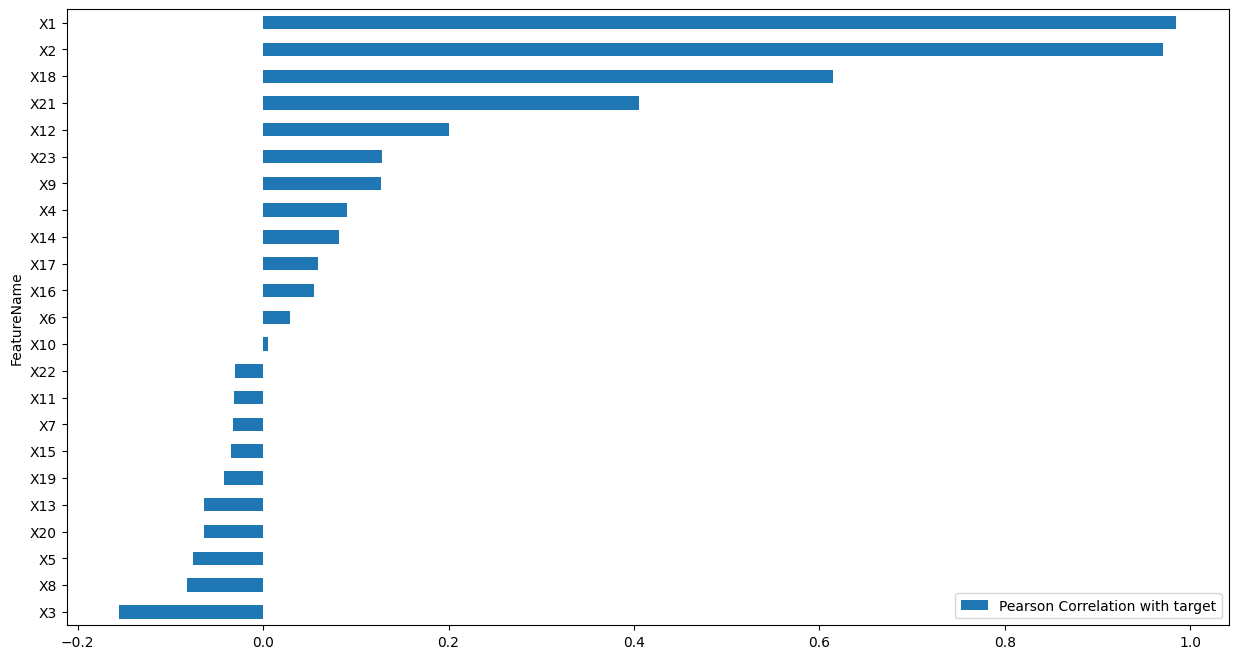

In [ ]:
features_importances_corr = pd.DataFrame({'FeatureName': df[column_selected].columns[0:len(df[column_selected])-1], 'Pearson Correlation with target': correlation})
features_importances_corr.sort_values(by = ['Pearson Correlation with target']).plot (figsize=(15,8), x="FeatureName", y = "Pearson Correlation with target", kind="barh")

- There is a strong positive linear relationship with variable X1 (0.984715) and X2 (0.970003), with correlation coefficients close to 1. This indicates that when the values of X1 or X2 increase, the value of X24 tends to increase correspondingly.

- There is a relatively weak relationship with variables X18 (0.614601), X21 (0.405820), X12 (0.200393), X23 (0.128246), and X9 (0.127501). Although the correlation coefficients are not high, they still indicate the presence of a positive correlation.

- There is a weak relationship with variables X4 (0.090712), X8 (-0.082186), X14 (0.081356), and X5 (-0.075716). Although the correlation coefficients are close to 0, they still show a weak correlation between the variables.

- The remaining variables have correlation coefficients close to 0 or very close to 0, indicating no significant linear relationship with the target variable X24.

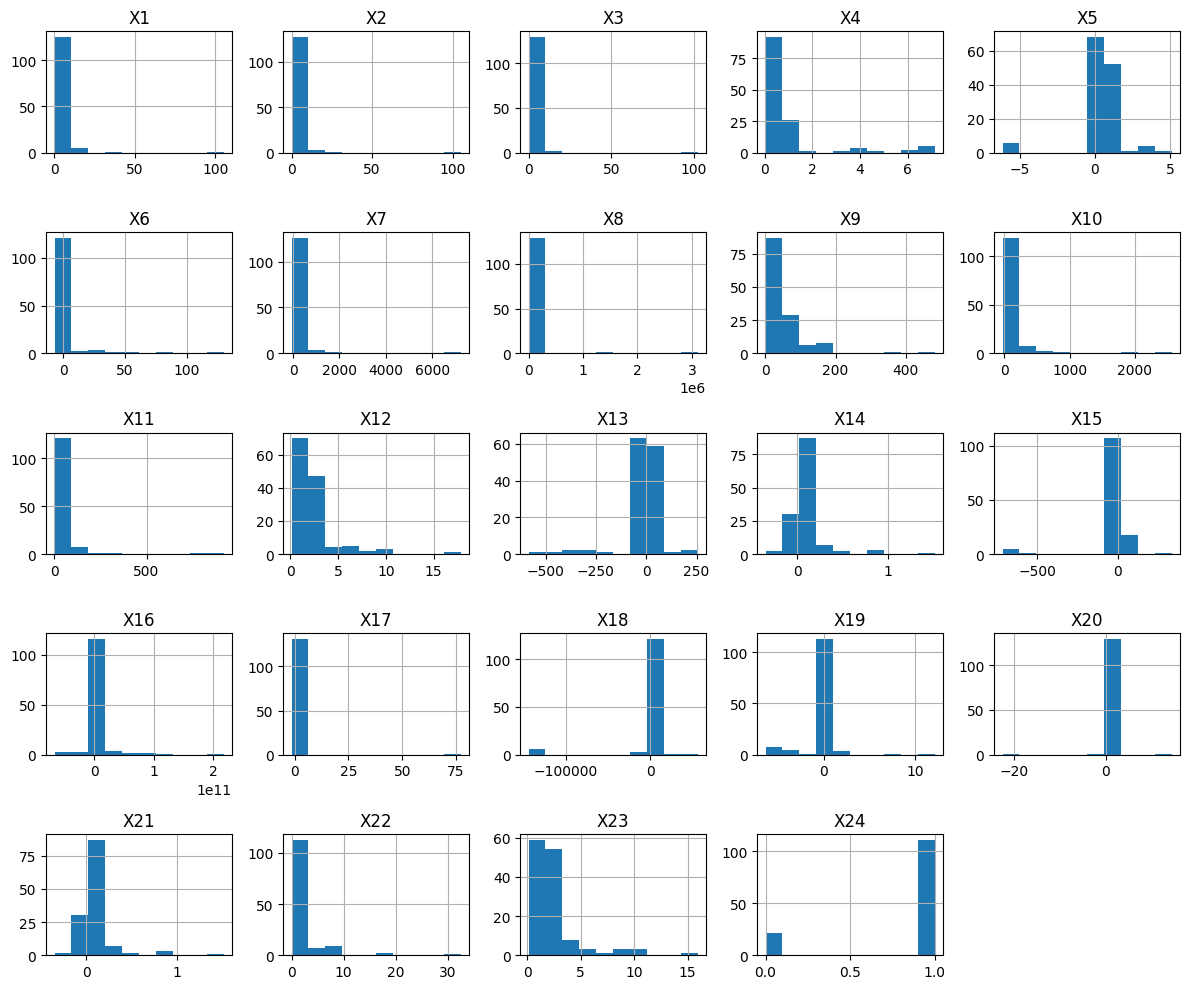

In [ ]:
df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

In [ ]:
features = df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23']]
target = df['X24']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

To perform predictions, the dataset is divided into two sets: the training set and the test set, where the training set needs to have a large proportion to learn from the data and build the prediction model. In this case, 20% of the data will be allocated to the test set, while the remaining 80% will be used for the training set.

# **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [ ]:
# plot_ROC_AUC_curve
def _plot_roc_curve(fpr, tpr, thres, auc):
    plt.figure(figsize = (10, 8))
    plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
    plt.plot([0, 1], [0, 1], '--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.title('ROC Curve')

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
LR_classifier = LogisticRegression(multi_class='multinomial',random_state=42)
LR_classifier.fit(X_train, y_train.ravel())
y_pred = LR_classifier.predict(X_train)
print('Confusion matrix:')
print(pd.DataFrame(confusion_matrix(y_train,y_pred)),'\n')
print('Classification report:')
print(classification_report(y_train,y_pred))
print('Logistic Regression accuracy: ', round(accuracy_score(y_train, y_pred),4))

Confusion matrix:
   0   1
0  8   8
1  5  84 

Classification report:
              precision    recall  f1-score   support

           0       0.62      0.50      0.55        16
           1       0.91      0.94      0.93        89

    accuracy                           0.88       105
   macro avg       0.76      0.72      0.74       105
weighted avg       0.87      0.88      0.87       105

Logistic Regression accuracy:  0.8762


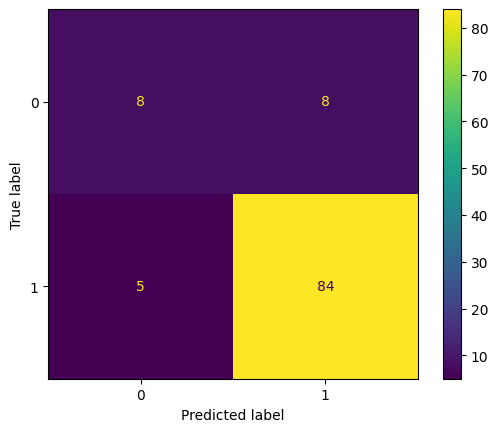

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(LR_classifier, X_train, y_train)
plt.show()

In [ ]:
importance_lr = LR_classifier.coef_[0] #use coeffcient as importance
features_importances_lr = pd.DataFrame({'FeatureName': features.columns, 'Logistic Regression Feature Importance': importance_lr})
features_importances_lr.sort_values(by=['Logistic Regression Feature Importance'], ascending=False)
features_importances_lr.reindex(features_importances_lr['Logistic Regression Feature Importance'].abs().sort_values(ascending=False).index)

,FeatureName,Logistic Regression Feature Importance
15,X16,2.945239e-11
7,X8,1.471347e-14
17,X18,6.405178e-16
6,X7,3.695783e-17
9,X10,2.673496e-17
10,X11,1.000827e-17
8,X9,5.776567e-18
14,X15,2.647237e-18
12,X13,1.575315e-18
0,X1,6.452093e-19


<Axes: ylabel='FeatureName'>

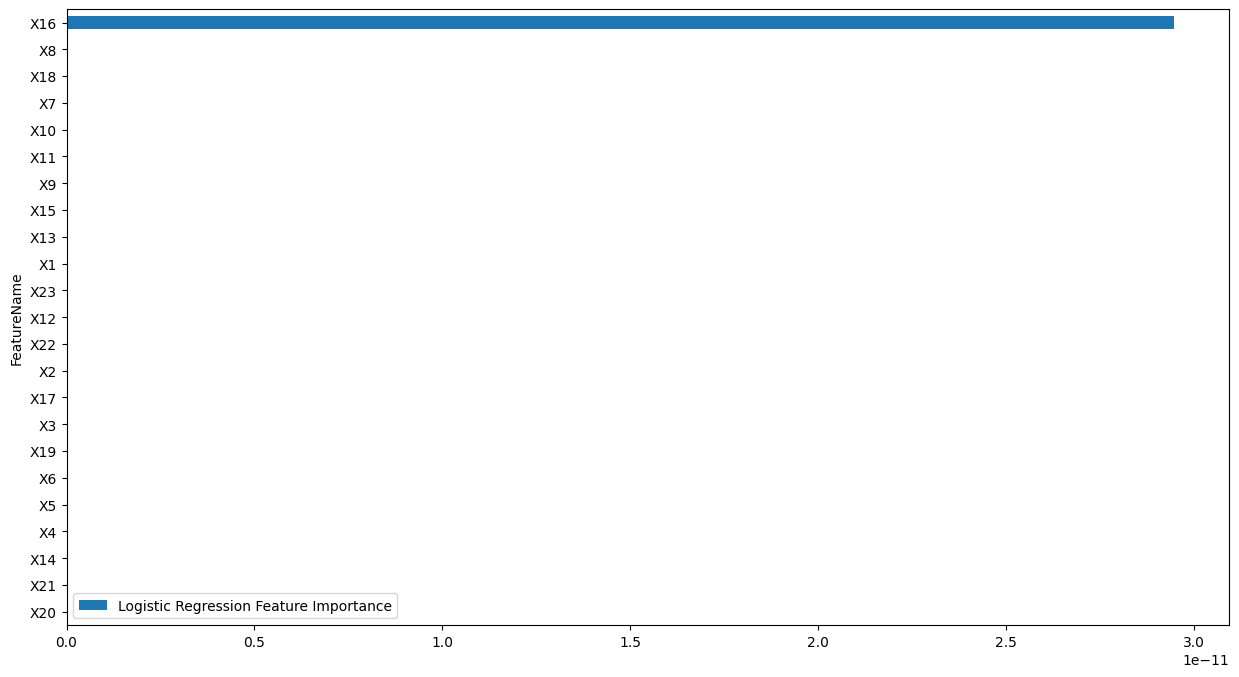

In [ ]:
features_importances_lr.sort_values("Logistic Regression Feature Importance").plot(figsize=(15,8), x="FeatureName", y=["Logistic Regression Feature Importance"], kind="barh")

- The importance values decrease in order from feature X16 (2.945239e-11) to feature X20 (-3.114171e-22).

- The importance of the features is very small, with values close to zero. This suggests that these features have little impact on the predictions of the Logistic Regression model.

- There is a significant difference between the importance values of the features. Feature X16 has the highest importance, while feature X20 has the lowest importance.

- X20 has a negative importance value (-3.114171e-22), indicating a negative correlation between this feature and the predictions of the Logistic Regression model.

In [ ]:
LR_classifier = LogisticRegression(multi_class='multinomial',random_state=42)
LR_classifier.fit(X_train, y_train.ravel())
y_pred = LR_classifier.predict(X_test)
print('Confusion matrix:')
print(pd.DataFrame(confusion_matrix(y_test,y_pred)),'\n')
print('Classification report:')
print(classification_report(y_test,y_pred))
print('Logistic Regression accuracy: ', round(accuracy_score(y_test, y_pred),4))

Confusion matrix:
   0   1
0  1   4
1  1  21 

Classification report:
              precision    recall  f1-score   support

           0       0.50      0.20      0.29         5
           1       0.84      0.95      0.89        22

    accuracy                           0.81        27
   macro avg       0.67      0.58      0.59        27
weighted avg       0.78      0.81      0.78        27

Logistic Regression accuracy:  0.8148


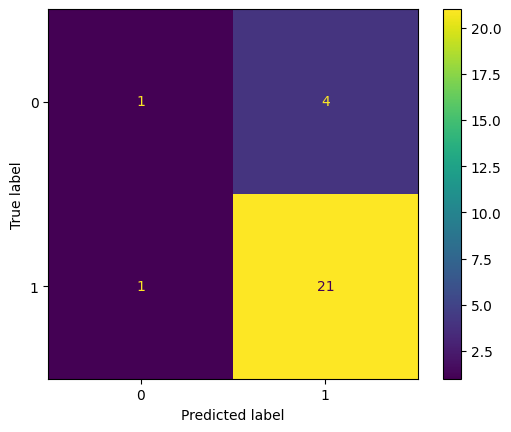

In [ ]:
ConfusionMatrixDisplay.from_estimator(LR_classifier, X_test, y_test)

<ipython-input-162-b0558fa7fca4>:4: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
<ipython-input-162-b0558fa7fca4>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)


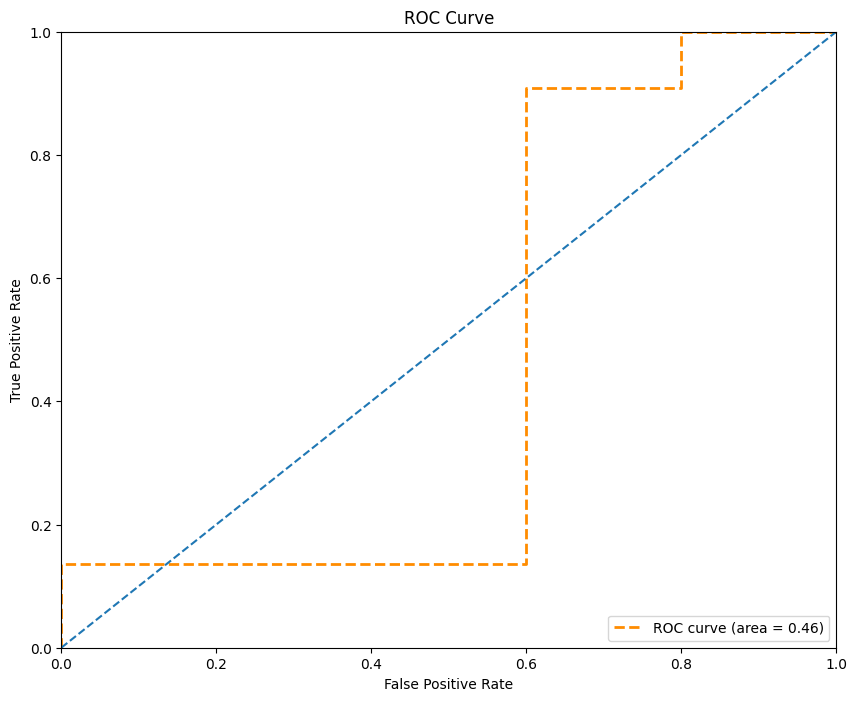

In [ ]:
# ROC
y_pred_prob_test = LR_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thres = roc_curve(y_test, y_pred_prob_test)
roc_auc = auc(fpr, tpr)
_plot_roc_curve(fpr, tpr, thres, roc_auc)

# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [ ]:
RF_classifier = RandomForestClassifier()
RF_classifier.fit(X_train, y_train.ravel())
y_pred = RF_classifier.predict(X_test)
print('Confusion matrix:')
print(pd.DataFrame(confusion_matrix(y_test,y_pred)),'\n')
print('Classification report:')
print(classification_report(y_test,y_pred))
print('Random Forest accuracy: ', round(accuracy_score(y_test, y_pred),2))

Confusion matrix:
   0   1
0  4   1
1  1  21 

Classification report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.95      0.95      0.95        22

    accuracy                           0.93        27
   macro avg       0.88      0.88      0.88        27
weighted avg       0.93      0.93      0.93        27

Random Forest accuracy:  0.93


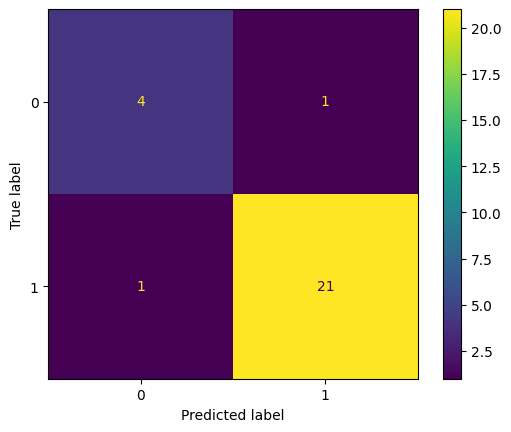

In [ ]:
ConfusionMatrixDisplay.from_estimator(RF_classifier, X_test, y_test)

In [ ]:
importance_rf = RF_classifier.feature_importances_
features_importances_rf = pd.DataFrame({'FeatureName': features.columns, 'Random Forest Feature Importance': importance_rf})
features_importances_rf.sort_values(by=['Random Forest Feature Importance'], ascending=False)
features_importances_rf.reindex(features_importances_rf['Random Forest Feature Importance'].abs().sort_values(ascending=False).index)

,FeatureName,Random Forest Feature Importance
4,X5,0.143277
0,X1,0.083972
3,X4,0.081802
12,X13,0.078626
10,X11,0.062153
17,X18,0.055338
22,X23,0.051767
18,X19,0.046845
14,X15,0.046588
1,X2,0.043210


<Axes: ylabel='FeatureName'>

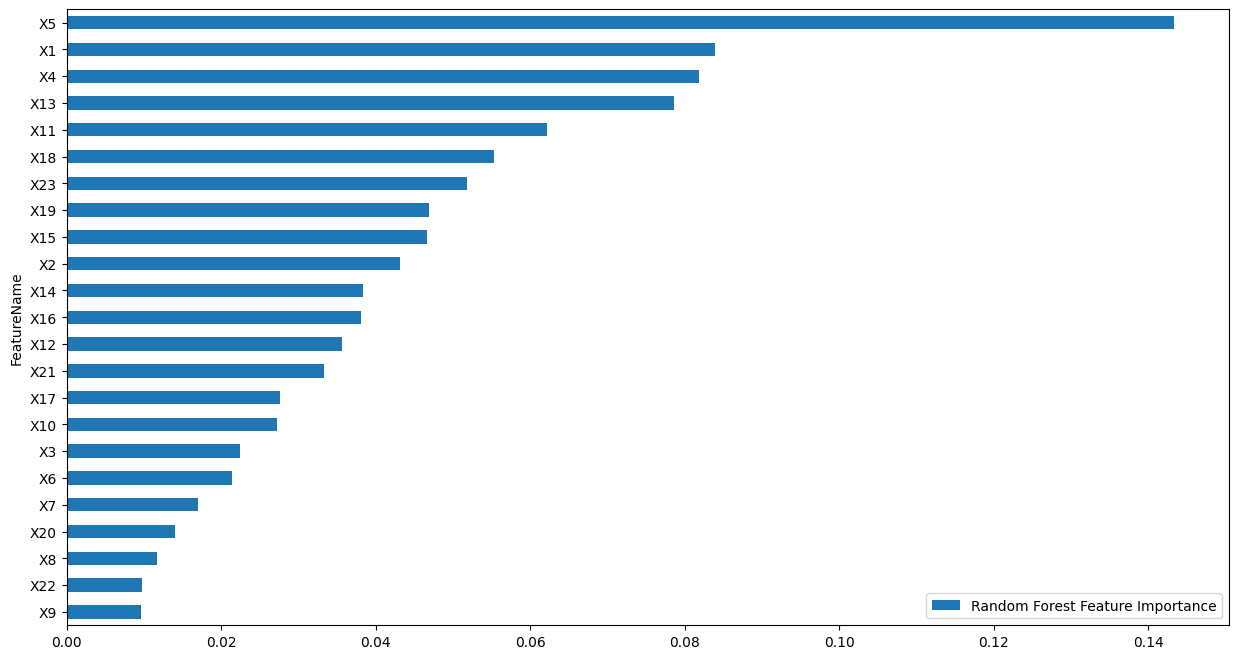

In [ ]:
features_importances_rf.sort_values("Random Forest Feature Importance").plot(figsize=(15,8), x="FeatureName", y=["Random Forest Feature Importance"], kind="barh")

- Based on the feature importance table of the Random Forest model, we can observe that features X5, X1, and X4 have higher importance levels compared to other features. Feature X5 has the highest importance with a value of 0.143277, followed by X1 with a value of 0.083972, and X4 with a value of 0.081802.

- Features X13, X11, X18, and X23 also have relatively high importance levels with values of 0.078626, 0.062153, 0.055338, and 0.051767 respectively.

- The remaining features have importance levels ranging from 0.046845 to 0.009580, and they tend to decrease.

- This indicates that features X5, X1, and X4 play important roles in predicting the outcome, while other features have less influence. Features with higher importance can provide crucial information for the classification or prediction process.

<ipython-input-162-b0558fa7fca4>:4: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
<ipython-input-162-b0558fa7fca4>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)


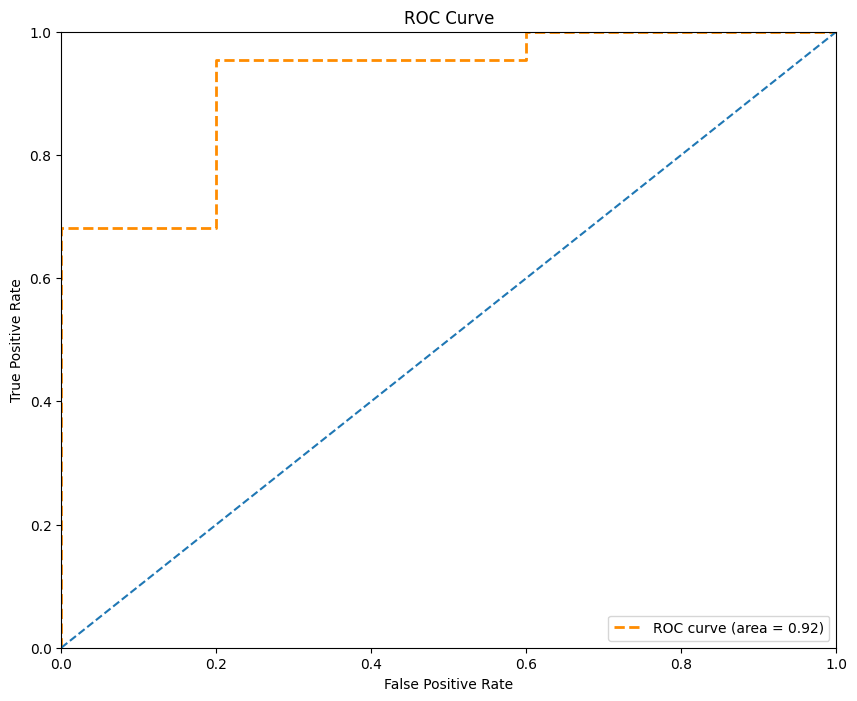

In [ ]:
y_pred_prob_test = RF_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thres = roc_curve(y_test, y_pred_prob_test)
roc_auc = auc(fpr, tpr)
_plot_roc_curve(fpr, tpr, thres, roc_auc)

With a ROC area value of 0.92, we can conclude that the model has a good classification ability with a fairly high level of accuracy.

# **XGB**

In [ ]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [ ]:
XGB_classifier = XGBClassifier()
XGB_classifier.fit(X_train, y_train.ravel())
y_pred = XGB_classifier.predict(X_test)
print('Confusion matrix:')
print(pd.DataFrame(confusion_matrix(y_test,y_pred)),'\n')
print('Classification report:')
print(classification_report(y_test,y_pred))
print('XGB accuracy: ', round(accuracy_score(y_test, y_pred),2))

Confusion matrix:
   0   1
0  4   1
1  3  19 

Classification report:
              precision    recall  f1-score   support

           0       0.57      0.80      0.67         5
           1       0.95      0.86      0.90        22

    accuracy                           0.85        27
   macro avg       0.76      0.83      0.79        27
weighted avg       0.88      0.85      0.86        27

XGB accuracy:  0.85


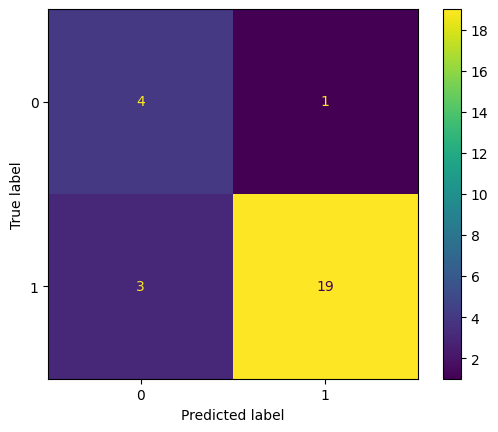

In [ ]:
ConfusionMatrixDisplay.from_estimator(XGB_classifier, X_test, y_test)

In [ ]:
importance_xgb = XGB_classifier.feature_importances_
features_importances_xgb = pd.DataFrame({'FeatureName': features.columns, 'XGBoost Feature Importance': importance_xgb})
features_importances_xgb.sort_values(by=['XGBoost Feature Importance'], ascending=False)
features_importances_xgb.reindex(features_importances_xgb['XGBoost Feature Importance'].abs().sort_values(ascending=False).index)

,FeatureName,XGBoost Feature Importance
18,X19,0.345613
3,X4,0.194920
4,X5,0.122410
10,X11,0.076060
11,X12,0.063508
13,X14,0.046473
0,X1,0.046155
16,X17,0.033544
19,X20,0.019277
2,X3,0.018271


<Axes: ylabel='FeatureName'>

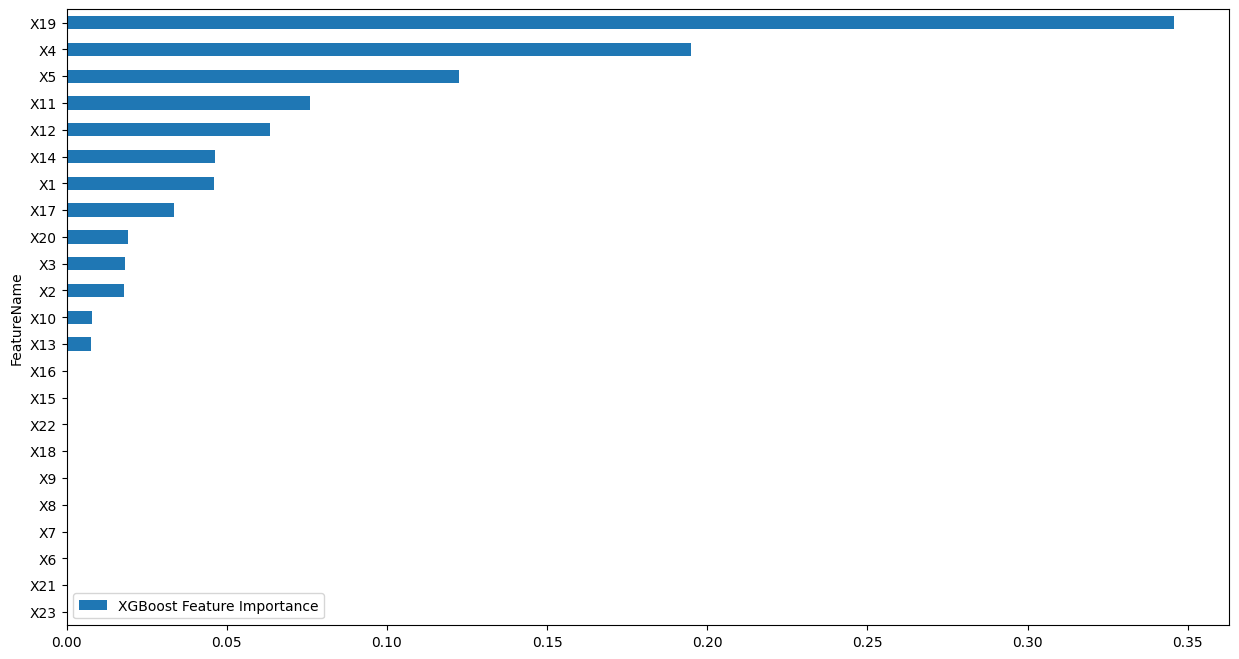

In [ ]:
features_importances_xgb.sort_values("XGBoost Feature Importance").plot(figsize=(15,8), x="FeatureName", y=["XGBoost Feature Importance"], kind="barh")

Based on the feature importance table of the XGBoost model, we can observe that features X19, X4, and X5 have higher importance levels compared to other features. Feature X19 has the highest importance level with a value of 0.345613, followed by X4 with a value of 0.194920, and X5 with a value of 0.122410. From these results, we can conclude that features X19, X4, and X5 play important roles in predicting the outcome in the XGBoost model. Other features have less or no significant contribution to the classification.

<ipython-input-162-b0558fa7fca4>:4: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
<ipython-input-162-b0558fa7fca4>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)


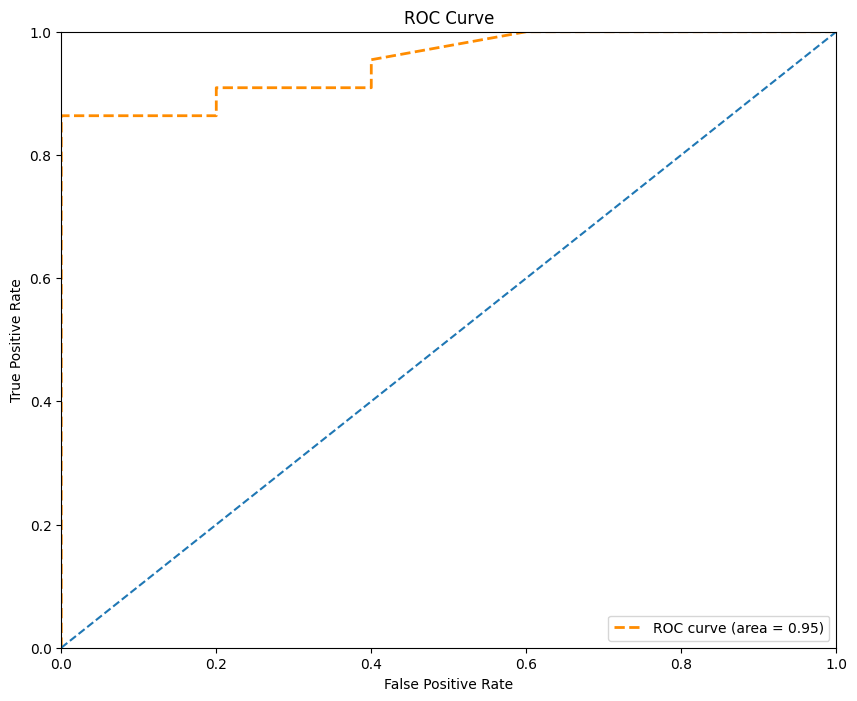

In [ ]:
y_pred_prob_test = XGB_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thres = roc_curve(y_test, y_pred_prob_test)
roc_auc = auc(fpr, tpr)
_plot_roc_curve(fpr, tpr, thres, roc_auc)

With a ROC area value of 0.95, we can conclude that the model has a good classification ability with a fairly high level of accuracy.

# **Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
NB_classifier = GaussianNB()
NB_classifier.fit(X_train, y_train.values.ravel())
# Dự báo giá trị biến phụ thuộc
y_pred = NB_classifier.predict(X_test)
print('Confusion matrix:')
print(pd.DataFrame(confusion_matrix(y_test,y_pred)),'\n')
print('Classification report:')
print(classification_report(y_test,y_pred))
print('Naive Bayes accuracy: ', accuracy_score(y_test, y_pred))

Confusion matrix:
   0   1
0  0   5
1  0  22 

Classification report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.81      1.00      0.90        22

    accuracy                           0.81        27
   macro avg       0.41      0.50      0.45        27
weighted avg       0.66      0.81      0.73        27

Naive Bayes accuracy:  0.8148148148148148


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


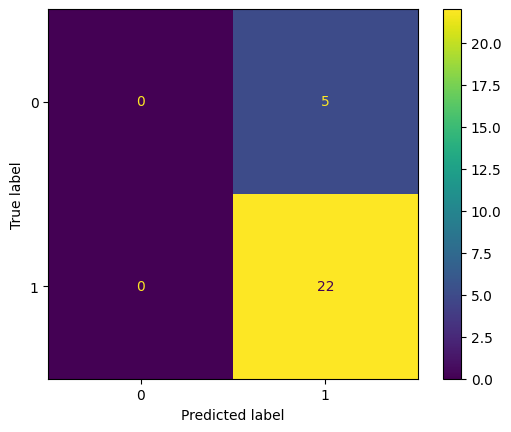

In [ ]:
ConfusionMatrixDisplay.from_estimator(NB_classifier, X_test, y_test)

<ipython-input-162-b0558fa7fca4>:4: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
<ipython-input-162-b0558fa7fca4>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)


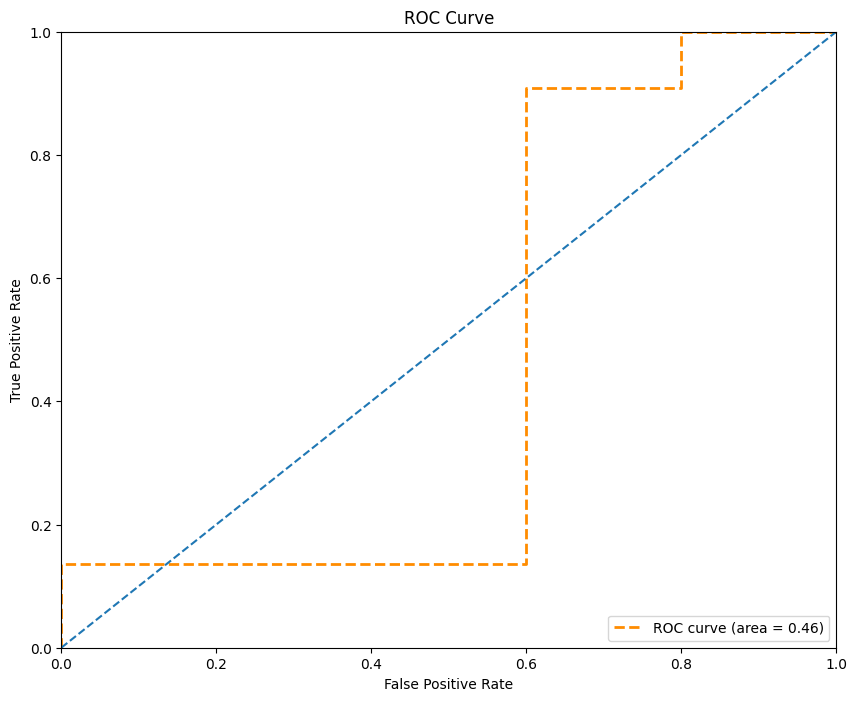

In [ ]:
y_pred_prob_test = NB_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thres = roc_curve(y_test, y_pred_prob_test)
roc_auc = auc(fpr, tpr)
_plot_roc_curve(fpr, tpr, thres, roc_auc)

ROC (Receiver Operating Characteristic) has an area of 0.46, it indicates that the predictive performance of the model has issues. The ROC area ranges from 0 to 1, and a value greater than 0.5 suggests that the model performs better than random guessing.

# **AdaBoost**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada_classifier = AdaBoostClassifier()
ada_classifier.fit(X_train, y_train.ravel())
y_pred = ada_classifier.predict(X_test)
print('Confusion matrix:')
print(pd.DataFrame(confusion_matrix(y_test,y_pred)),'\n')
print('Classification report:')
print(classification_report(y_test,y_pred))
print('AdaBoost accuracy: ', accuracy_score(y_test, y_pred))

Confusion matrix:
   0   1
0  3   2
1  2  20 

Classification report:
              precision    recall  f1-score   support

           0       0.60      0.60      0.60         5
           1       0.91      0.91      0.91        22

    accuracy                           0.85        27
   macro avg       0.75      0.75      0.75        27
weighted avg       0.85      0.85      0.85        27

AdaBoost accuracy:  0.8518518518518519


In [ ]:
importance_ada = ada_classifier.feature_importances_
features_importances_ada = pd.DataFrame({'FeatureName': df.columns[0:len(df.columns)-1], 'AdaBoost Feature Importance': importance_ada})
features_importances_ada.sort_values(by=['AdaBoost Feature Importance'], ascending=False)

,FeatureName,AdaBoost Feature Importance
0,X1,0.12
6,X7,0.10
9,X10,0.08
18,X19,0.08
10,X11,0.08
17,X18,0.06
12,X13,0.06
11,X12,0.06
5,X6,0.04
1,X2,0.04


<Axes: ylabel='FeatureName'>

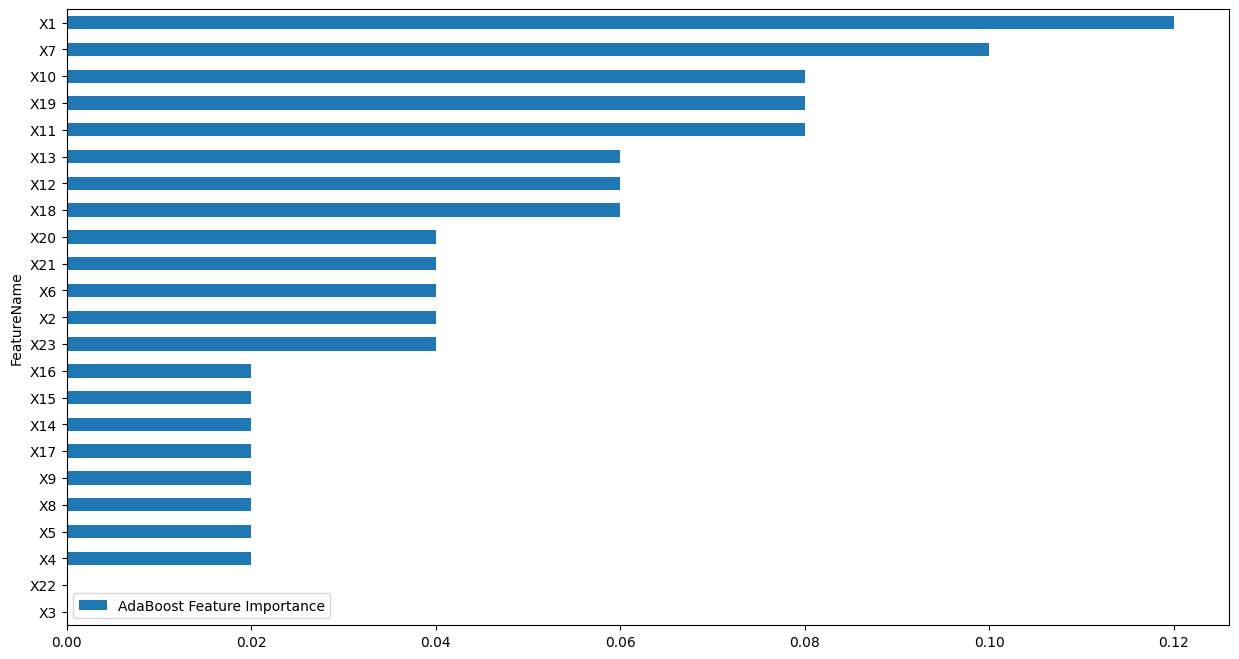

In [ ]:
features_importances_ada.sort_values("AdaBoost Feature Importance").plot(figsize=(15,8), x="FeatureName", y=["AdaBoost Feature Importance"], kind="barh")

Based on the feature importance table of the AdaBoost model, we can see that features X1, X7, X10, X19, and X11 have higher importance levels compared to other features. Feature X1 has the highest importance level with a value of 0.12, followed by X7, X10, X19, and X11 with values of 0.10, 0.08, 0.08, and 0.08, respectively.

Other features have importance levels ranging from 0.06 to 0.00, with the majority of features having a value of 0.02.

This indicates that features X1, X7, X10, X19, and X11 play important roles in predicting the outcome in the AdaBoost model. Other features have less or no significant contribution to the classification.

<ipython-input-162-b0558fa7fca4>:4: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
<ipython-input-162-b0558fa7fca4>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)


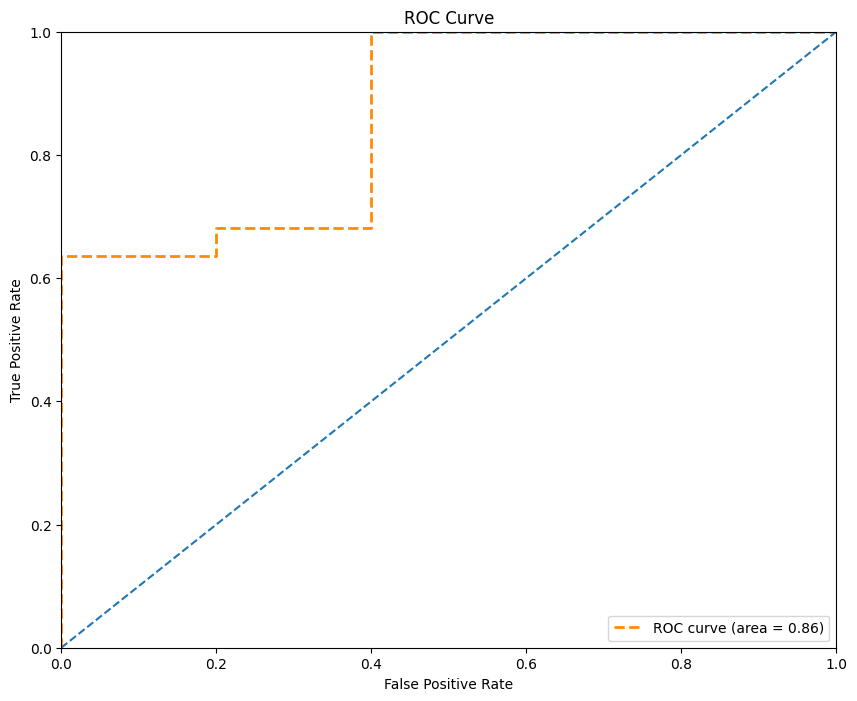

In [ ]:
y_pred_prob_test = ada_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thres = roc_curve(y_test, y_pred_prob_test)
roc_auc = auc(fpr, tpr)
_plot_roc_curve(fpr, tpr, thres, roc_auc)

With an ROC value of 0.86, this is a relatively good result. It indicates that the model has a better classification ability compared to a random model, accurately classifying around 86% of the cases.

# **SVM**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import numpy as np
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train.ravel())
y_pred = svm_classifier.predict(X_test )
print('Confusion matrix:')
print(pd.DataFrame(confusion_matrix(y_test,y_pred)),'\n')
print('Classification report:')
print(classification_report(y_test,y_pred))
print('SVM accuracy: ', accuracy_score(y_test, y_pred))

Confusion matrix:
   0   1
0  1   4
1  0  22 

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.20      0.33         5
           1       0.85      1.00      0.92        22

    accuracy                           0.85        27
   macro avg       0.92      0.60      0.62        27
weighted avg       0.87      0.85      0.81        27

SVM accuracy:  0.8518518518518519


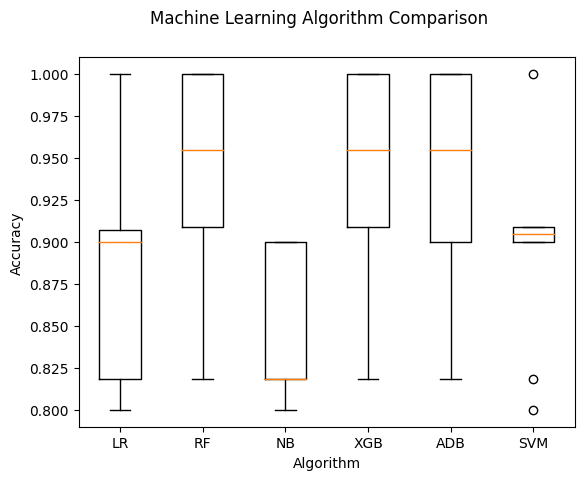

In [ ]:
models = [
    ('LR', LogisticRegression()),
    ('RF', RandomForestClassifier()),
    ('NB', GaussianNB()),
    ('XGB', XGBClassifier()),
    ('ADB', AdaBoostClassifier()),
    ('SVM', SVC())
]
# Evaluate each model on the test set using 10-fold cross-validation and store the results
results = []
names = []
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
# Generate a boxplot comparing the model performance
fig = plt.figure()
fig.suptitle('Machine Learning Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
data = [
    {'model': 'Logistic Regression', 'accuracy': 0.8148, 'tn': 1, 'fp': 4, 'fn': 1, 'tp': 21},
    {'model': 'Random Forest', 'accuracy': 0.93, 'tn': 4, 'fp': 1, 'fn': 1, 'tp': 21},
    {'model': 'XGB', 'accuracy': 0.85, 'tn': 4, 'fp': 1, 'fn': 3, 'tp': 19},
    {'model': 'Naive Bayes', 'accuracy': 0.8148, 'tn': 0, 'fp': 5, 'fn': 0, 'tp': 22},
    {'model': 'AdaBoost', 'accuracy': 0.8519, 'tn': 3, 'fp': 2, 'fn': 2, 'tp': 20},
    {'model': 'SVM', 'accuracy': 0.85, 'tn': 1, 'fp': 4, 'fn': 0, 'tp': 22}
]

df = pd.DataFrame(data)
df['precision'] = df['tp'] / (df['tp'] + df['fp'])
df['recall'] = df['tp'] / (df['tp'] + df['fn'])
df['f1-score'] = 2 * (df['precision'] * df['recall']) / (df['precision'] + df['recall'])

summary_table = df[['model','tn','fp', 'fn', 'tp', 'accuracy', 'precision', 'recall', 'f1-score']]
summary_table = summary_table.set_index('model')
print(summary_table)

                     tn  fp  fn  tp  accuracy  precision    recall  f1-score
model                                                                       
Logistic Regression   1   4   1  21    0.8148   0.840000  0.954545  0.893617
Random Forest         4   1   1  21    0.9300   0.954545  0.954545  0.954545
XGB                   4   1   3  19    0.8500   0.950000  0.863636  0.904762
Naive Bayes           0   5   0  22    0.8148   0.814815  1.000000  0.897959
AdaBoost              3   2   2  20    0.8519   0.909091  0.909091  0.909091
SVM                   1   4   0  22    0.8500   0.846154  1.000000  0.916667


The Random Forest and SVM have the best performance with high accuracy and F1-score. Logistic Regression and XGBoost also achieve relatively good results, while Naive Bayes and AdaBoost have slightly lower performance but are still worth considering depending on the specific requirements of the problem.